## 워드투벡터(Word2Vec)

원-핫 벡터는 단어 간 유사도를 계산할 수 없다는 단점을 개선하여 단어 간 유사도를 반영할 수 있도록 단어의 의미를 벡터화 하는 방법

### 분산 표현(Distributed Representation)

단어의 '의미'를 다차원 공간에 벡터화하는 방법

분산 표현을 이용하여 단어의 유사도를 벡터화하는 작업은 워드 임베딩(embedding)

이렇게 표현된 벡터 `임베딩 벡터(embedding vector)`라 하고 `밀집 벡터(dense vector)`에도 속함

`분산 표현(distributed representation)` 방법은 기본적으로 `분포 가설(distributional hypothesis)`이라는 가정 하에 만들어진 표현 방법

이 가정은 `'비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'`라는 가정

분산 표현은 분포 가설을 이용하여 단어들의 셋을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산하여 표현

원-핫 벡터처럼 벡터의 차원이 단어 집합(vocabulary)의 크기일 필요가 없으므로, `벡터의 차원`이 상대적으로 `저차원`으로 줄어듬

희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현

이런 표현 방법을 사용하면 단어 간 `유사도를 계산 가능`

이를 위한 학습 방법으로는 NNLM, RNNLM 등이 있으나 요즘에는 해당 방법들의 속도를 대폭 개선시킨 Word2Vec를 사용

Word2Vec에는 `CBOW(Continuous Bag of Words)`와 `Skip-Gram` 두 가지 방식이 있음

### CBOW(Continuous Bag of Words)

CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법

예문 : "The fat cat sat on the mat"

가운데 단어를 예측하는 것이 CBOW

{"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측하는 것은 CBOW가 하는 일

예측해야하는 단어 sat을 `중심 단어(center word)`

예측에 사용되는 단어들을 `주변 단어(context word)`

중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 `윈도우(window)`

윈도우 크기가 2이고 중심 단어가 sat이면 앞의 두 단어인 fat와 cat, 그리고 뒤의 두 단어인 on, the를 참고

즉 윈도우 크기가 n이면 참고하려고 하는 주변 단어의 개수는 2n

윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있음

해당 방법을 방법을 `슬라이딩 윈도우(sliding window)`라 함

CBOW를 인공 신경망으로 나타내면

Input layer(one-hot vector, W_{V*M}) -> Projection layer(M) -> Output layer(one-hot vector, W'_{M*V})

W는 각 층의 가중치, V는 단어 집합의 크기, M은 투사층의 크기

입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터

출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요

Word2Vec는 딥 러닝 모델(Deep Learning Model)은 아님

입력층과 출력층 사이에 하나의 은닉층만이 존재하는 `얕은신경망(Shallow Neural Network)`

은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않고

룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 함

`투사층의 크기가 M`, 이는 `임베딩하고 난 벡터의 차원`

입력층과 투사층 사이의 가중치 W는 V × M 행렬, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬

예를 들어 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬이 될 것

이 `두 행렬`은 동일한 행렬을 전치(transpose)한 것이 아니라, `서로 다른 행렬`

신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가짐

`CBOW`는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 `W와 W'를 학습해가는 구조`

중심 단어 sat을 위해 주변 단어인 앞의 fat, cat, 그리고 뒤의 on, the 를 참조한다고 하면

각 주변 단어의 원-핫 벡터를 x라 할때, 입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱은

$ x_{fat} \times W_{V \times M} = V_{fat} $

$ x_{cat} \times W_{V \times M} = V_{cat} $

$ x_{on} \times W_{V \times M} = V_{on} $

$ x_{the} \times W_{V \times M} = V_{the} $

입력 벡터는 원-핫 벡터 이므로 `입력 벡터와 가중치 W 행렬의 곱`은 사실 `W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일`

그래서 이 작업을 `룩업 테이블(lookup table)`이라고 부름

주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터 v를 구하게 됨, n은 윈도우 사이즈

$ v = \frac{\sum V}{2 \times n} = \frac{V_{fat} + V_{cat} + V_{on} + V_{the}}{2 \times 2} $

구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해짐, 곱셈의 결과로 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옴

$ W'_{M \times V} \times v = z $

$ \hat{y} = softmax(z) $

CBOW는 softmax 함수를 취함, 따라서 출력값은 0-1로 총합은 1이 되는 상태로 변환됨 이렇게 나온 벡터를 `스코어 벡터(score vector)`라 함

스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률를 나타냄

스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 함

중심 단어를 y라고 할때 스코어 벡터와 중심 단어 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수(loss function)로 cross-entropy 함수를 사용

$ H(\hat{y}, y) = - \displaystyle\sum_{j=1}^{|V|} y_j log(\hat{y}_j) $

y가 원-핫 벡터라는 점을 고려하여 식을 간소화 시킬 수 있음

$ H(\hat{y}, y) = - y_i log(\hat{y}_i) $

c를 중심 단어에서 1을 가진 차원의 값의 인덱스라 하면, $\hat{y_c} = 1$ 이면 $\hat{y}$가 $y$를 정확히 예측한 경우가 됨, -1 log(1) = 0이므로 H 값을 최소화 하는 방향으로 학습해야 함

학습이 다 되었다면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정

때로는 W와 W'의 평균치를 가지고 임베딩 벡터를 선택하기도 함

### Skip-gram

Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법

CBOW와 구조적으로 매우 유사

입력층 입력이 여러개인 CBOW와 달리 출력층 출력이 여러개

중심 단어에 대해서 주변 단어를 예측하기 때문에, 투사층에서 벡터들의 평균을 구하는 과정이 없음

전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려짐

### 네거티브 샘플링(Negative Sampling)

대체적으로 Word2Vec를 사용한다고 하면 `SGNS(Skip-Gram with Negative Sampling)`을 사용

Skip-gram을 사용하는데, `네거티브 샘플링(Negative Sampling)`이란 방법까지 추가로 사용

Word2Vec 모델의 문제로 느린 속도가 있음

출력층에 있는 소프트맥스 함수는 단어 집합 크기의 벡터 내의 모든 값을 0과 1사이의 값이면서 모두 더하면 1이 되도록 바꾸는 작업을 수행

이에 대한 오차를 구하고 모든 단어에 대한 임베딩을 조정

그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도 마찬가지로 수행하므로 단어 집합의 크기가 수백만에 달한다면 이 작업은 굉장히 무거운 작업

중요한건 Word2Vec이 모든 단어 집합에 대해서 소프트맥스 함수를 수행하고, 역전파를 수행하므로 주변 단어와 상관 없는 모든 단어까지의 워드 임베딩 조정 작업을 수행한다는 것

연관 관계가 없는 수많은 단어의 임베딩을 조정할 필요가 없기에 효율적으로 개선한것이 네거티브 샘플링

랜덤으로 선택된 주변 단어가 아닌 상관없는 단어들을 일부만 가지고 옴

전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단계를 이진 분류 문제로 바꾸면

Word2Vec은 주변 단어들을 긍정(positive)으로 두고 랜덤으로 샘플링 된 단어들을 부정(negative)으로 둔 다음에 이진 분류 문제를 수행

이는 기존의 다중 클래스 분류 문제를 이진 분류 문제로 바꾸면서도 연산량에 있어서 훨씬 효율적

## Word2Vec 학습

### 영어 Word2Vec 학습

In [55]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [48]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1f5c4efeef0>)

In [49]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

In [50]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))
print(parse_text[:100])

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To m


In [51]:
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)
print(content_text[:100])

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To m


In [52]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)
print(sent_text[:3])
print(len(sent_text))

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.", 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.', 'Both are necessary, but it can be too much of a good thing.']
273424


In [53]:
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

print(normalized_text[:3])
print(len(normalized_text))

['here are two reasons companies fail they only do more of the same or they only do what s new ', 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ', 'both are necessary but it can be too much of a good thing ']
273424


In [54]:
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]
print(result[:3])
print(len(result))

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']]
273424


In [56]:
# vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [57]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.83526611328125), ('guy', 0.8066557049751282), ('lady', 0.7584183216094971), ('boy', 0.7542266249656677), ('soldier', 0.7402964234352112), ('girl', 0.7344778180122375), ('gentleman', 0.7243386507034302), ('kid', 0.6848291158676147), ('surgeon', 0.6488459706306458), ('son', 0.6479711532592773)]


In [58]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.83526611328125), ('guy', 0.8066557049751282), ('lady', 0.7584183216094971), ('boy', 0.7542266249656677), ('soldier', 0.7402964234352112), ('girl', 0.7344778180122375), ('gentleman', 0.7243386507034302), ('kid', 0.6848291158676147), ('surgeon', 0.6488459706306458), ('son', 0.6479711532592773)]


### 한국어 Word2Vec 학습

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

okt = Okt()

In [66]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1f5e97d57b0>)

In [67]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [68]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())
# 리뷰 개수
print(len(train_data))

True
200000


In [69]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수

False
199992


In [70]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [72]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [73]:
# 토큰화
tokenized_data = []
for sentence in train_data['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338453538141525


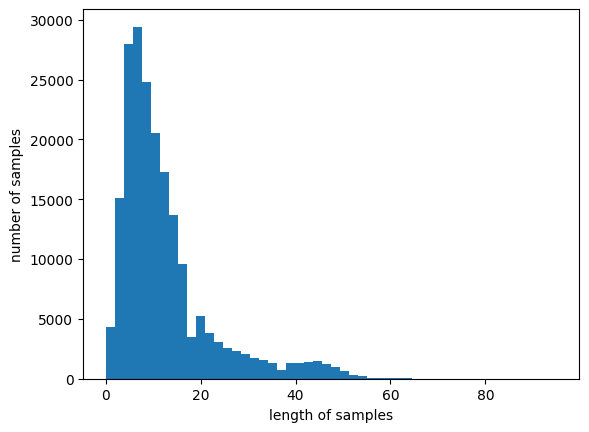

In [74]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [75]:
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [76]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17615, 100)

In [77]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8355047702789307), ('이민호', 0.809681236743927), ('서영희', 0.8062328100204468), ('미스캐스팅', 0.800957977771759), ('문소리', 0.7962473034858704), ('윤제문', 0.7947454452514648), ('워싱턴', 0.7945224046707153), ('안성기', 0.7914506793022156), ('박중훈', 0.7908391952514648), ('유다인', 0.7891507744789124)]


In [78]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8328016400337219), ('블록버스터', 0.8196350336074829), ('무협', 0.8194879293441772), ('호러', 0.8181779980659485), ('SF', 0.8056692481040955), ('무비', 0.803513765335083), ('물', 0.8020604848861694), ('sf', 0.7917997241020203), ('느와르', 0.7864056825637817), ('물의', 0.7746751308441162)]


In [79]:
model.wv.save_word2vec_format('kor_w2v') # 모델 저장

### 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding)

사전에 훈련된 워드 임베딩(pre-trained word embedding vector)를 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용할 수 있음

예를 들어서 감성 분류 작업을 하는데 훈련 데이터의 양이 부족한 상황이라면, 

다른 방대한 데이터를 Word2Vec이나 GloVe 등으로 사전에 학습시켜놓은 임베딩 벡터들을 가지고 와서 모델의 입력으로 사용하는 것이 때로는 더 좋은 성능을 얻을 수 있음

Word2vec 모델은 자연어 처리에서 단어를 밀집 벡터로 만들어주는 단어 임베딩 방법론이지만 최근에 들어서는 자연어 처리를 넘어서 추천 시스템에도 사용되고 있는 모델

적당하게 데이터를 나열해주면 Word2vec은 위치가 근접한 데이터를 유사도가 높은 벡터를 만들어준다는 점에서 착안된 아이디어(item2vec)